### All Techniques Of Hyper Parameter Optimization

- GridSearchCV
- RandomizedSearchCV
- Bayesian Optimization -Automate Hyperparameter Tuning (Hyperopt)
- Sequential Model Based Optimization(Tuning a scikit-learn estimator with skopt)
- Optuna- Automate Hyperparameter Tuning
- Genetic Algorithms (TPOT Classifier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

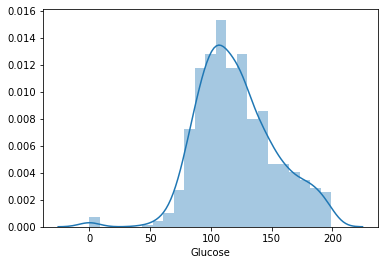

In [3]:
sns.distplot(df.Glucose)

In [4]:
import numpy as np
df['Glucose']=np.where(df['Glucose']==0, df['Glucose'].median(), df['Glucose'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


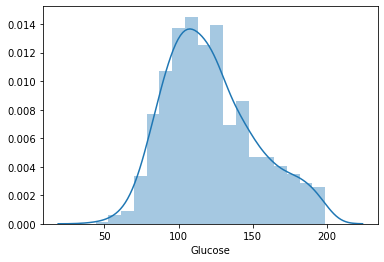

In [5]:
sns.distplot(df.Glucose)

In [6]:
#### Independent And Dependent features
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,0,33.6,0.627,50
1,1,85.0,66,29,0,26.6,0.351,31
2,8,183.0,64,0,0,23.3,0.672,32
3,1,89.0,66,23,94,28.1,0.167,21
4,0,137.0,40,35,168,43.1,2.288,33


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
pd.DataFrame(X,columns=df.columns[:-1]).tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,10,101.0,76,48,180,32.9,0.171,63
764,2,122.0,70,27,0,36.8,0.340,27
765,5,121.0,72,23,112,26.2,0.245,30
766,1,126.0,60,0,0,30.1,0.349,47
767,1,93.0,70,31,0,30.4,0.315,23


In [10]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)
prediction = rf_classifier.predict(X_test)

In [12]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[41 10]
 [10 16]]
0.7402597402597403
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        51
           1       0.62      0.62      0.62        26

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.74      0.74      0.74        77



In [14]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[45  6]
 [ 8 18]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        51
           1       0.75      0.69      0.72        26

    accuracy                           0.82        77
   macro avg       0.80      0.79      0.79        77
weighted avg       0.82      0.82      0.82        77



### Randomized Search CV

In [15]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

In [17]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [18]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid,
    n_iter=100, cv=3,
    verbose=2,
    random_state=100,
    n_jobs=-1
)

In [19]:
### fit the randomized model
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [20]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'entropy'}

In [21]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
best_random_grid = rf_randomcv.best_estimator_

In [23]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[44  7]
 [ 7 19]]
Accuracy Score 0.8181818181818182
Classification report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.73      0.73      0.73        26

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77



In [24]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'entropy'}

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [450], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [600, 700, 800, 900, 1000]}


In [26]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  4.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [27]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=450, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
best_grid=grid_search.best_estimator_

In [29]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[44  7]
 [ 8 18]]
Accuracy Score 0.8051948051948052
Classification report:               precision    recall  f1-score   support

           0       0.85      0.86      0.85        51
           1       0.72      0.69      0.71        26

    accuracy                           0.81        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.80      0.81      0.80        77



### Automated Hyperparameter Tuning

Automated Hyperparameter Tuning can be done by using techniques such as

- Bayesian Optimization
- Gradient Descent
- Evolutionary Algorithms

#### Bayesian Optimization

Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

- Objective Function = defines the loss function to minimize.
- Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
- Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [30]:
from hyperopt import (
    hp, 
    fmin, 
    tpe, 
    STATUS_OK, 
    Trials
)

In [31]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
}
space

{'criterion': <hyperopt.pyll.base.Apply at 0x1bb3c216cc8>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x1bb3c218208>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1bb3c213648>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1bb3c211fc8>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x1bb3c211a48>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1bb3c20fe88>}

In [32]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [33]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn = objective,
            space = space,
            algo = tpe.suggest,
            max_evals = 80,
            trials = trials)
best

100%|███████████████████████████████████████████████| 80/80 [05:54<00:00,  4.43s/trial, best loss: -0.7698988635178813]


{'criterion': 1,
 'max_depth': 770.0,
 'max_features': 2,
 'min_samples_leaf': 0.0022236194036839192,
 'min_samples_split': 0.024212957033487057,
 'n_estimators': 1}

In [34]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}

print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

gini
log2
50


In [35]:
best['min_samples_leaf']

0.0022236194036839192

In [36]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test, predictionforest))
print(accuracy_score(y_test, predictionforest))
print(classification_report(y_test, predictionforest))
acc5 = accuracy_score(y_test, predictionforest)

[[45  6]
 [ 8 18]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        51
           1       0.75      0.69      0.72        26

    accuracy                           0.82        77
   macro avg       0.80      0.79      0.79        77
weighted avg       0.82      0.82      0.82        77



### Genetic Algorithms

__Genetic Algorithms tries to apply natural selection mechanisms to Machine Learning contexts.__

Let's immagine we create a population of N Machine Learning models with some predifined Hyperparameters. We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.

In [37]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [39]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(
    generations = 5, population_size = 24, offspring_size = 12,
    verbosity = 2, early_stop = 12,
    config_dict = {'sklearn.ensemble.RandomForestClassifier': param}, 
    cv = 4, scoring = 'accuracy'
)

tpot_classifier.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.7756250840166689
Generation 2 - Current best internal CV score: 0.7756250840166689
Generation 3 - Current best internal CV score: 0.7756250840166689
Generation 4 - Current best internal CV score: 0.7756250840166689
Generation 5 - Current best internal CV score: 0.7756250840166689
Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=400), criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=2000)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [40]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.8181818181818182



### Optimize hyperparameters of the model using Optuna

The hyperparameters of the above algorithm are `n_estimators` and `max_depth` for which we can try different values to see if the model accuracy can be improved. The objective function is modified to accept a trial object. This trial has several methods for sampling hyperparameters. We create a study to run the hyperparameter optimization and finally read the best hyperparameters.

In [41]:
import optuna
import sklearn.svm

def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000, 10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()

In [42]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-07-24 03:07:59,372] Finished trial#0 with value: 0.6497835497835498 with parameters: {'classifier': 'SVC', 'svc_c': 0.0015660490384854775}. Best is trial#0 with value: 0.6497835497835498.
[I 2020-07-24 03:08:05,628] Finished trial#1 with value: 0.7482276177928352 with parameters: {'classifier': 'RandomForest', 'n_estimators': 1990, 'max_depth': 89.34611334214281}. Best is trial#1 with value: 0.7482276177928352.
[I 2020-07-24 03:08:06,913] Finished trial#2 with value: 0.6497835497835498 with parameters: {'classifier': 'SVC', 'svc_c': 0.3738337836945634}. Best is trial#1 with value: 0.7482276177928352.
[I 2020-07-24 03:08:07,087] Finished trial#3 with value: 0.6497835497835498 with parameters: {'classifier': 'SVC', 'svc_c': 3368137887.2257295}. Best is trial#1 with value: 0.7482276177928352.
[I 2020-07-24 03:08:11,546] Finished trial#4 with value: 0.7482276177928352 with parameters: {'classifier': 'RandomForest', 'n_estimators': 1780, 'max_depth': 33.27516861649865}. Best is tria

[I 2020-07-24 03:09:22,316] Finished trial#36 with value: 0.6497835497835498 with parameters: {'classifier': 'SVC', 'svc_c': 23772.30338333502}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:09:24,683] Finished trial#37 with value: 0.7467783424305163 with parameters: {'classifier': 'RandomForest', 'n_estimators': 790, 'max_depth': 83.94146566223978}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:09:26,754] Finished trial#38 with value: 0.7453353409875149 with parameters: {'classifier': 'RandomForest', 'n_estimators': 550, 'max_depth': 94.64728454384392}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:09:29,807] Finished trial#39 with value: 0.746772068511199 with parameters: {'classifier': 'RandomForest', 'n_estimators': 1240, 'max_depth': 64.77568196179041}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:09:34,642] Finished trial#40 with value: 0.7511198945981553 with parameters: {'classifier': 'RandomForest

[I 2020-07-24 03:11:38,231] Finished trial#72 with value: 0.7482213438735178 with parameters: {'classifier': 'RandomForest', 'n_estimators': 1490, 'max_depth': 23.249452863066548}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:11:41,529] Finished trial#73 with value: 0.7482213438735178 with parameters: {'classifier': 'RandomForest', 'n_estimators': 1160, 'max_depth': 10.427056648434352}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:11:45,150] Finished trial#74 with value: 0.7482276177928352 with parameters: {'classifier': 'RandomForest', 'n_estimators': 1440, 'max_depth': 27.193462854907224}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:11:48,927] Finished trial#75 with value: 0.7453353409875149 with parameters: {'classifier': 'RandomForest', 'n_estimators': 1360, 'max_depth': 20.434263907375207}. Best is trial#24 with value: 0.7540184453227932.
[I 2020-07-24 03:11:53,133] Finished trial#76 with value: 0.7453227931488801 wit

Accuracy: 0.7540184453227932
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 65.9299283155072}


In [45]:
print(trial)
print(study.best_params)

FrozenTrial(number=24, value=0.7540184453227932, datetime_start=datetime.datetime(2020, 7, 24, 3, 8, 59, 840571), datetime_complete=datetime.datetime(2020, 7, 24, 3, 9, 1, 813198), params={'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 65.9299283155072}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'SVC')), 'n_estimators': IntUniformDistribution(high=2000, low=200, step=10), 'max_depth': LogUniformDistribution(high=100, low=10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=24, state=TrialState.COMPLETE)
{'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 65.9299283155072}


In [43]:
rf = RandomForestClassifier(n_estimators=330,max_depth=30)
rf.fit(X_train,y_train)

FrozenTrial(number=24, value=0.7540184453227932, datetime_start=datetime.datetime(2020, 7, 24, 3, 8, 59, 840571), datetime_complete=datetime.datetime(2020, 7, 24, 3, 9, 1, 813198), params={'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 65.9299283155072}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'SVC')), 'n_estimators': IntUniformDistribution(high=2000, low=200, step=10), 'max_depth': LogUniformDistribution(high=100, low=10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=24, state=TrialState.COMPLETE)
{'classifier': 'RandomForest', 'n_estimators': 700, 'max_depth': 65.9299283155072}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=330,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  7]
 [ 7 19]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.73      0.73      0.73        26

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77

